# Default Of Credit Card Clients


## About this dataset
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.<br>
<b>Our task</b> is developing a model to tell if client will `default` the payment or `not`.

### Features
- X1: Amount of the given credit.<br>
- X2: Gender (male; female).<br>
- X3: Education (graduate school; university; high school; others).<br>
- X4: Marital status (married; single; others).<br>
- X5: Age (years).<br>
- X6 – X11: History of past payments.<br>

 - Tracked past monthly payment records (from April to September, 2005) are displayed as follows:<br>
    X6 = the repayment status in September, 2005<br>
    X7 = the repayment status in August, 2005.<br>
    :<br>
    X11 = the repayment status in April, 2005.<br> 
 
 - The measurement scale for the repayment status is:<br>
    -1 = pay duly<br>
    1 = payment delay for one month<br>
    2 = payment delay for two months<br>
    :<br>
    8 = payment delay for eight months<br>
    9 = payment delay for nine months and above.<br>

- X12-X17: Amount of bill statement to each customer<br>
> X12 = in September, 2005<br>
X13 = in August, 2005<br>
:<br>
X17 = in April, 2005.<br>

- X18-X23: Amount of previous payment:<br>
    that each customer paid back to the credit-card company from April 2005 through September 2005. Each of these amounts was paid to settle the preceding month's bill, either in full or partially. For example, each September 2005 amount was paid to settle the corresponding customer's August 2005 bill.

> X18 = amount paid in September, 2005<br>
X19 = amount paid in August,2005.<br>
:<br>
X23 = amount paid in April, 2005.<br>

- Y: Did the person default? (`Yes = 1`, `No = 0`)

### Dataset attributions
Website: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Name: I-Cheng Yeh<br>
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw<br>
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.<br>
other contact information: 886-2-26215656 ext. 3181

## Load packages

In [1]:
import numpy as np
import pandas as pd
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from scipy.stats import loguniform

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

%matplotlib inline

from datetime import datetime 

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import LeaveOneOut
# random search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix


## Read the data

> The 1st row must be droped and make row 1 a header for our dataframe, as it has representative names

In [2]:
df = pd.read_excel("default of credit card clients.xls",skiprows=1)
df.head()

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university  married   24      2      2     -1   
1   2     120000  female  university   single   26     -1      2      0   
2   3      90000  female  university   single   34      0      0      0   
3   4      50000  female  university  married   37      0      0      0   
4   5      50000    male  university  married   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

### Look for more details

In [3]:
df.shape

(30000, 25)

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Information about the features
    Length of Dataframe, Data type, and Null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

There are 25 columns, 30000 Rows<br>
`Education & MARRIAGE` have missing values<br>
All features are `integer` type except `SEX`, `EDUCATION`, and `MARRIAGE` are object type

In [6]:
df.describe()

ID       LIMIT_BAL           AGE         PAY_0         PAY_2  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667     35.518833     -0.016700     -0.133767   
std     8660.398374   129747.661567      9.528019      1.123802      1.197186   
min        1.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%     7500.750000    50000.000000     28.000000     -1.000000     -1.000000   
50%    15000.500000   140000.000000     34.000000      0.000000      0.000000   
75%    22500.250000   240000.000000     41.000000      0.000000      0.000000   
max    30000.000000  1000000.000000    267.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169139      1.133187      1.149988   73635.860576   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3558.750000   
50%        0.000000      0.000000      0.000000      0.000000   22381.500000   
75%        0.000000      0.000000      0.000000      0.000000   67091.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 22 columns]

There are outliers in `Age` as the max value equals 267 which seems Abnormal.<br>
`BILL_AMT1` to `BILL_AMT6` have also outliers as the min values are `Negative` although it should be zero or above.

### Check Duplication

In [7]:
df.duplicated().sum()

0

### Show Categories in EDUCATION, MARRIAGE, and SEX

In [8]:
df.EDUCATION.unique()

array(['university', 'graduate school', 'others', 'high school', nan, 0],
      dtype=object)

In [9]:
df.MARRIAGE.unique()

array(['married', 'single', nan, 0], dtype=object)

In [10]:
df.SEX.unique()

array(['female', 'male'], dtype=object)

## Data Exploring

In [11]:
sns.set(font_scale=1.3)

### Distribution of AGE

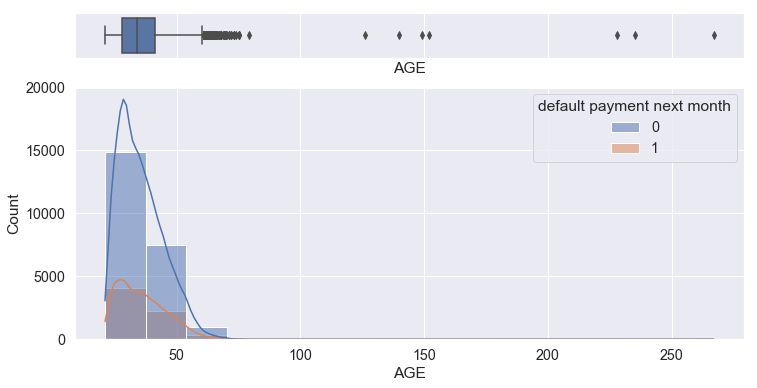

In [12]:
figure, (ax_box, ax_hist) = plt.subplots(2
                                        , sharex=True
                                        , gridspec_kw={"height_ratios": (.15, .85)}
                                        , figsize=(12,6)
                                       )

sns.boxplot(df["AGE"]
            , ax=ax_box
           )

sns.histplot(data=df
             , x="AGE"
             , label="Age"
             , kde=True
             , hue='default payment next month'
             , ax=ax_hist
             , bins=15
            )
plt.show()

As we said earlier the `age` is Right skewed and has alot of outliers

In [13]:
print(df['AGE'].value_counts(bins=15, sort=False))

(20.753, 37.4]    18955
(37.4, 53.8]       9739
(53.8, 70.2]       1284
(70.2, 86.6]         15
(86.6, 103.0]         0
(103.0, 119.4]        0
(119.4, 135.8]        1
(135.8, 152.2]        3
(152.2, 168.6]        0
(168.6, 185.0]        0
(185.0, 201.4]        0
(201.4, 217.8]        0
(217.8, 234.2]        1
(234.2, 250.6]        1
(250.6, 267.0]        1
Name: AGE, dtype: int64


After `70 years` old the number of rows is very `low`

In [14]:
df[df.AGE>=71].shape

(22, 25)

### Distribution of Bill Amount

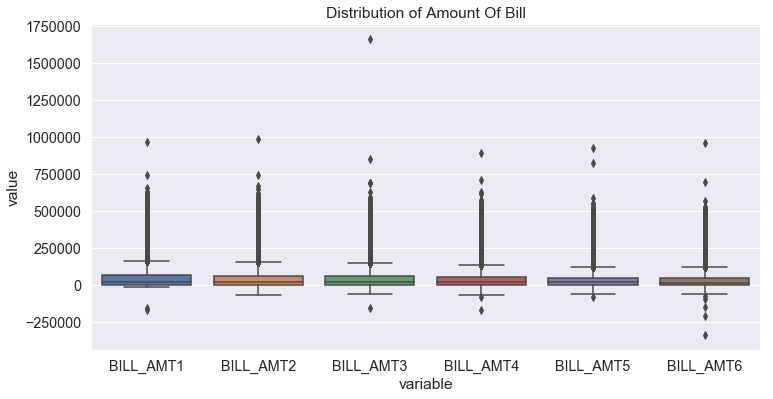

In [15]:
bill = df[['BILL_AMT{}'.format(i) for i in range(1,7)]]
plt.figure(figsize=(12,6))

sns.boxplot(x="variable"
            , y="value"
            , data=pd.melt(bill)
           )

plt.title("Distribution of Amount Of Bill")
plt.show()

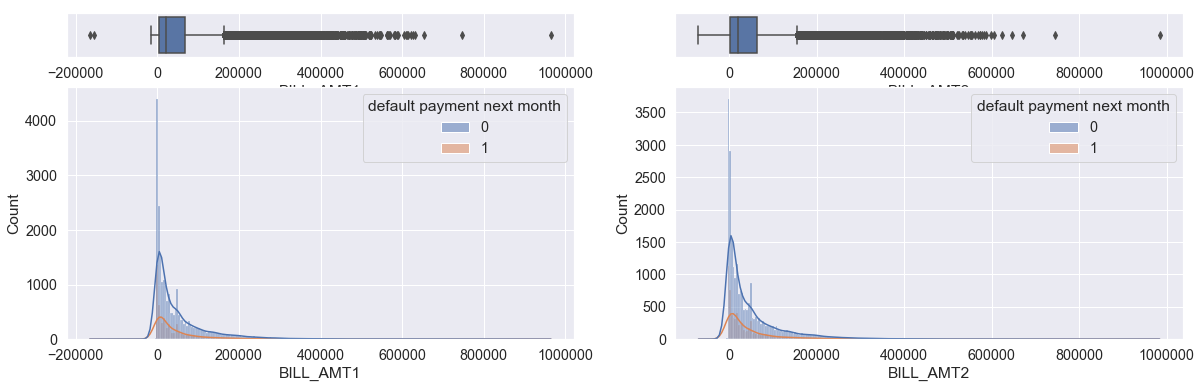

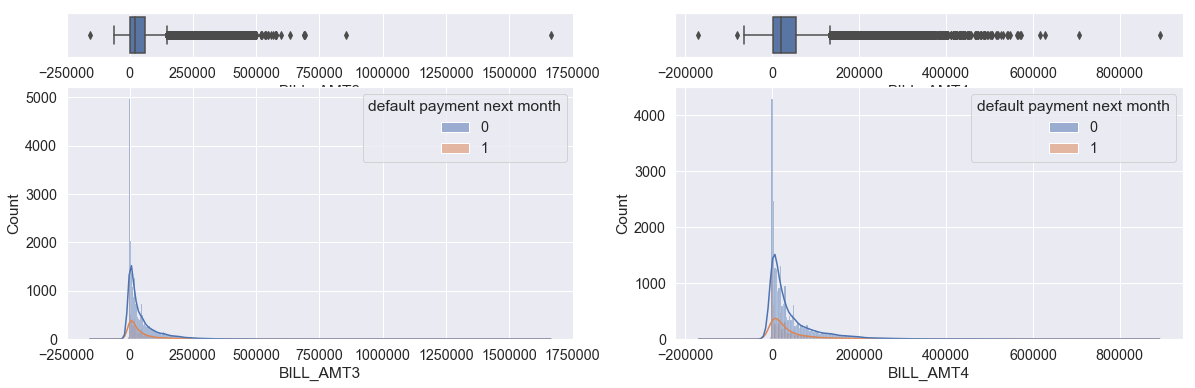

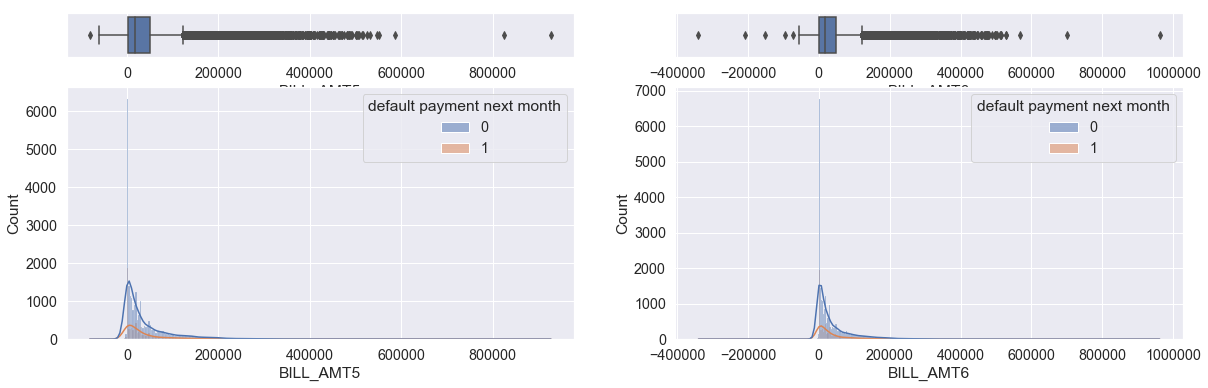

In [16]:
f, ax = plt.subplots(2,2
                    , figsize=(20,6)
                    , gridspec_kw={"height_ratios": (.15, .85)}
                   )

for i in range(1,7):
    sns.boxplot(df["BILL_AMT{}".format(i)]
                , ax=ax[0,(i-1)%2]
               )
    sns.histplot(data=df
                 , x="BILL_AMT{}".format(i)
                 , label="BILL_AMT{}".format(i)
                 , kde=True
                 , hue='default payment next month'
                 , ax=ax[1,(i-1)%2])
    if i%2==0:
        plt.show()
        if i<6:
            f, ax = plt.subplots(2,2
                        , figsize=(20,6)
                        , gridspec_kw={"height_ratios": (.15, .85)}
                       )
    

### Distribution of Payment Amount

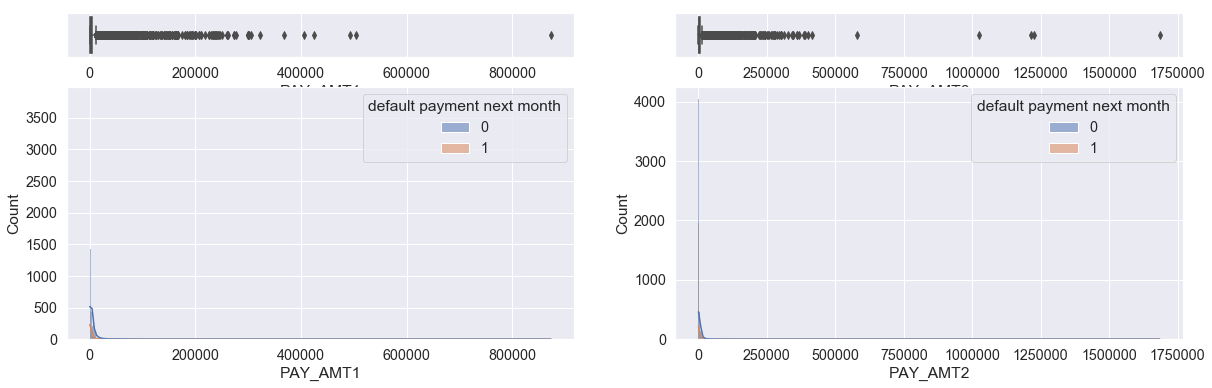

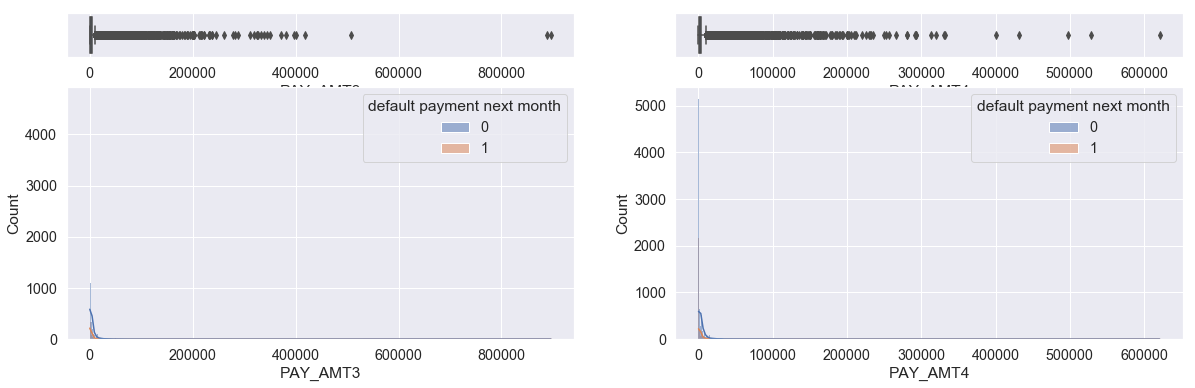

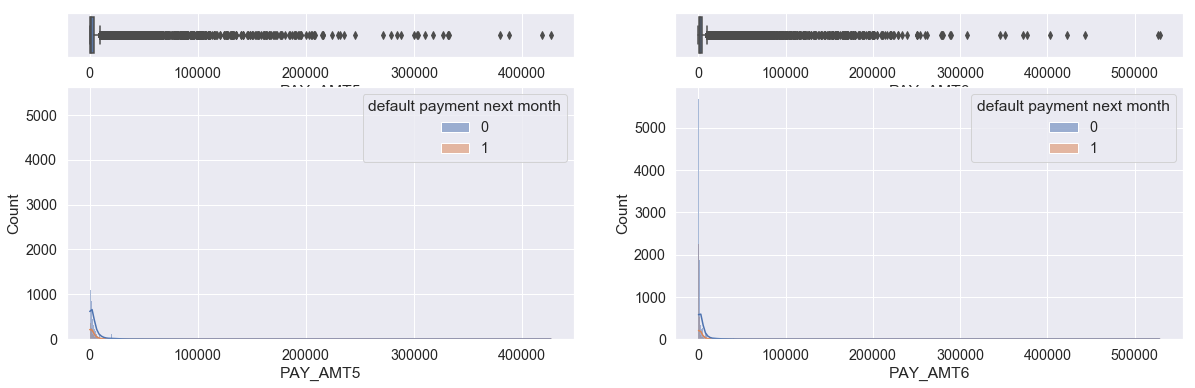

In [17]:
f, ax = plt.subplots(2,2
                    , figsize=(20,6)
                    , gridspec_kw={"height_ratios": (.15, .85)}
                   )

for i in range(1,7):
    sns.boxplot(df["PAY_AMT{}".format(i)]
                , ax=ax[0,(i-1)%2]
               )
    sns.histplot(data=df
                 , x="PAY_AMT{}".format(i)
                 , label="PAY_AMT{}".format(i)
                 , kde=True
                 , hue='default payment next month'
                 , ax=ax[1,(i-1)%2])
    if i%2==0:
        plt.show()
        if i<6:
            f, ax = plt.subplots(2,2
                        , figsize=(20,6)
                        , gridspec_kw={"height_ratios": (.15, .85)}
                       )
    

There are `huge` outliers in `Payment Amount`

### Distribution of Target `default payment next month` column

In [18]:
default = df['default payment next month'].replace({0:'NotDefault'
                          ,1:'Default'}).value_counts()
default = default.reset_index().rename(columns={'index':'name'})
default

name  default payment next month
0  NotDefault                       23364
1     Default                        6636

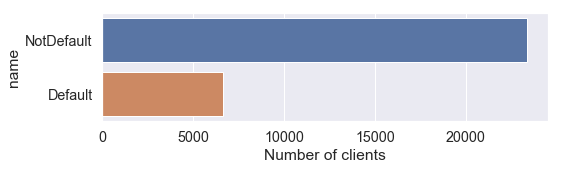

In [19]:
plt.figure(figsize=(8,2))
ax = sns.barplot(x = 'default payment next month'
            , y= 'name'
            , data=default)
ax.set_xlabel('default payment next month')
plt.xlabel('Number of clients')
plt.show()

In [20]:
ratio = default.iloc[1,1]/default['default payment next month'].sum()
ratio,default.iloc[1,1]

(0.2212, 6636)

A number of `6,636` out of 30,000 (or `22%`) of clients will `default` next month.<br>
And the dataset is `imbalance`.

## Split the data to training and Production
> before doing any preprocessing, feature engineering, .... etc  on it, to make it (test data) represent real test data/ simulate a production data.<br>
we use `Stratified` technique to ensure we preserve the ratio of classes

In [21]:
df = df.sample(frac=1)

X = df.drop(columns='default payment next month').copy()
y = df['default payment next month'].copy()

X_train,X_prod,y_train,y_prod=train_test_split(X
                                               ,y
                                               ,test_size=0.1
                                               , random_state=42
                                               , shuffle=True
                                               , stratify=y
                                              )

In [22]:
print('test: ',y_prod.sum()/len(y_prod))
print('train: ',y_train.sum()/len(y_train))

test:  0.22133333333333333
train:  0.22118518518518518


In [23]:
df_prod = X_prod
df_prod['default payment next month'] = y_prod
df_prod.to_csv('default prod.csv',index=False)

In [24]:
df_prod.shape

(3000, 25)

### Check train dataset

In [25]:
df_train = X_train
df_train['Default']=y_train
df_train

ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  \
26864  26865     250000    male  graduate school  married   40     -1     -1   
24632  24633     210000    male       university   single   48     -1     -1   
20340  20341     200000  female      high school  married   56      0      0   
20512  20513     200000    male       university   single   27      0      0   
9990    9991     330000  female       university  married   45      0      0   
...      ...        ...     ...              ...      ...  ...    ...    ...   
6339    6340     200000  female       university      NaN   35     -1     -1   
15118  15119     370000    male       university  married   55      0      0   
9167    9168      20000  female      high school      NaN   56     -1      2   
3610    3611     210000  female  graduate school   single   28      0      0   
23552  23553     500000  female       university  married   43      0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
26864     -1     -1  ...        396        396        396       396       396   
24632     -1     -1  ...        526       4880       1315      2776      2776   
20340      0      0  ...     160375     163444          0      5039      8000   
20512      0      0  ...     195319     193566     182175      7565      9593   
9990       0      0  ...      50595      40491      31020      2000      2500   
...      ...    ...  ...        ...        ...        ...       ...       ...   
6339      -1     -1  ...       2040      16338       2076      8290      9427   
15118      0      0  ...     366054     310869     311284     15901     13603   
9167      -1     -1  ...        780        390       1738      1473      1473   
3610       0      0  ...     136410     140051     142976      9000      9007   
23552      0      0  ...     353297     377371     365278     14000     14500   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
26864       396       396       396       109        0  
24632       526      4880         0      1315        0  
20340      3500      3269         0         0        0  
20512      6919      5666      4686      4500        0  
9990       1309      1243      2027      1056        0  
...         ...       ...       ...       ...      ...  
6339       2240     16000      2076       833        0  
15118     13500     11014     12024     16027        0  
9167        780         0      1766         0        1  
3610       5254      6000      5500      5000        0  
23552     13000     13000     15000     15000        0  

[27000 rows x 25 columns]

We can resume our work now 

## Fill missing values

In [26]:
def fill_null(features):
    """
    fill_null(df):
        fill null value EDUCATION with others, MARRIAGE with unknown
        , SEX with most frequent value, and all numeric columns with median value.
    Parameters:
        features: pandas dataframe
            features to handle missing values in it
    Return:
        cleaned_features: pandas dataframe
            features after handling missing values.
    """
    features.EDUCATION = features.EDUCATION.fillna('others')
    features.MARRIAGE = features.MARRIAGE.fillna('unknown')
    features.SEX = features.SEX.fillna(features.SEX.mode()[0])
    cleaned_features = features.fillna(features.quantile())
    return cleaned_features

In [27]:
df_train.EDUCATION.unique()

array(['graduate school', 'university', 'high school', nan, 'others', 0],
      dtype=object)

In [28]:
df_train.isna().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION    303
MARRIAGE     297
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
Default        0
dtype: int64

In [29]:
df_clean = fill_null(df_train.copy())
df_clean.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [30]:
pd.merge(df_train.EDUCATION.value_counts(),df_clean.EDUCATION.value_counts(), left_index=True, right_index=True,how='outer')

EDUCATION_x  EDUCATION_y
university             12634        12634
graduate school         9529         9529
high school             4405         4405
others                   116          419
0                         13           13

In [31]:
pd.merge(df_train.MARRIAGE.value_counts(),df_clean.MARRIAGE.value_counts(), left_index=True, right_index=True,how='outer')

MARRIAGE_x  MARRIAGE_y
0              48.0          48
married     12315.0       12315
single      14340.0       14340
unknown         NaN         297

As we see `others` value increase in education and `unknow` in marriage

### Validate values

In [32]:
def validate_values(features):
    """validate_values(features)
    convert invalide value to valide one
    Parameters: 
        features: pandas df
            features to validate
    Return:
        features: pandas df
            df after validation
    """
    # Valide value for EDUCATION
    edu_cate = ['university','graduate school','high school','others']
    # convert invalide value to others
    features['EDUCATION'] = features.EDUCATION.apply(lambda x: x if x in edu_cate else 'others')
    
    # Valide value for MARRIAGE
    mari_cate = ['single','married']
    # convert invalide value to unknown
    features['MARRIAGE'] = features.MARRIAGE.apply(lambda x: x if x in mari_cate else 'unknown')
    
    # Valide value for SEX
    sex_cate = ['male','female']
    # convert invalide value to unknown
    features['SEX'] = features.SEX.apply(lambda x: x if x in sex_cate else 'others')
    return features
    

In [33]:
df_clean = validate_values(df_clean)
df_clean.head()

ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  \
26864  26865     250000    male  graduate school  married   40     -1     -1   
24632  24633     210000    male       university   single   48     -1     -1   
20340  20341     200000  female      high school  married   56      0      0   
20512  20513     200000    male       university   single   27      0      0   
9990    9991     330000  female       university  married   45      0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
26864     -1     -1  ...        396        396        396       396       396   
24632     -1     -1  ...        526       4880       1315      2776      2776   
20340      0      0  ...     160375     163444          0      5039      8000   
20512      0      0  ...     195319     193566     182175      7565      9593   
9990       0      0  ...      50595      40491      31020      2000      2500   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
26864       396       396       396       109        0  
24632       526      4880         0      1315        0  
20340      3500      3269         0         0        0  
20512      6919      5666      4686      4500        0  
9990       1309      1243      2027      1056        0  

[5 rows x 25 columns]

In [34]:
pd.merge(df_train.EDUCATION.value_counts(),df_clean.EDUCATION.value_counts(), left_index=True, right_index=True,how='outer')

EDUCATION_x  EDUCATION_y
0                         13          NaN
graduate school         9529       9529.0
high school             4405       4405.0
others                   116        432.0
university             12634      12634.0

In [35]:
pd.merge(df_train.MARRIAGE.value_counts(),df_clean.MARRIAGE.value_counts(), left_index=True, right_index=True,how='outer')

MARRIAGE_x  MARRIAGE_y
0              48.0         NaN
married     12315.0     12315.0
single      14340.0     14340.0
unknown         NaN       345.0

Number of `others` value in education and `unknow` in marriage increase again, as we validate the values

## Categorical Encoding
one hot encoding

In [36]:
def age_bins(age):
    """
    age_bins(age):
        convert age to bins
        ['21 to 35', '36 to 55', '56 to 70', 'above 70']
        Parameters:
            age:pandas series
        return pandas_series
    """
    age = age.apply(lambda x: x if x<=70 else 100)
    return pd.cut(x=age
               , bins=[20, 35, 55, 70, 100]
               , labels=['21 to 35'
                         , '36 to 55'
                         , '56 to 70'
                         , 'above 70'])    

In [37]:
df_clean['age_bin'] = age_bins(df_clean['AGE'])
df_clean.drop(columns=['AGE']
              ,inplace=True)
df_clean.head()

ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  PAY_0  PAY_2  \
26864  26865     250000    male  graduate school  married     -1     -1   
24632  24633     210000    male       university   single     -1     -1   
20340  20341     200000  female      high school  married      0      0   
20512  20513     200000    male       university   single      0      0   
9990    9991     330000  female       university  married      0      0   

       PAY_3  PAY_4  PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
26864     -1     -1     -1  ...        396        396       396       396   
24632     -1     -1     -1  ...       4880       1315      2776      2776   
20340      0      0      0  ...     163444          0      5039      8000   
20512      0      0      0  ...     193566     182175      7565      9593   
9990       0      0      0  ...      40491      31020      2000      2500   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default   age_bin  
26864       396       396       396       109        0  36 to 55  
24632       526      4880         0      1315        0  36 to 55  
20340      3500      3269         0         0        0  56 to 70  
20512      6919      5666      4686      4500        0  21 to 35  
9990       1309      1243      2027      1056        0  36 to 55  

[5 rows x 25 columns]

In [38]:
def cate_encode(df):
    return pd.get_dummies(df)

In [39]:
df_clean = cate_encode(df_clean)

In [40]:
df_clean = pd.merge(df_clean.drop(columns='Default')
                    ,df_clean.Default
                    ,left_index=True
                    ,right_index=True
                   )

In [41]:
df_clean.head()

ID  LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
26864  26865     250000     -1     -1     -1     -1     -1     -1        396   
24632  24633     210000     -1     -1     -1     -1     -1      0       2776   
20340  20341     200000      0      0      0      0      0      0     193392   
20512  20513     200000      0      0      0      0      0      0     202591   
9990    9991     330000      0      0      0      0      0      0      47644   

       BILL_AMT2  ...  EDUCATION_others  EDUCATION_university  \
26864        396  ...                 0                     0   
24632       2776  ...                 0                     1   
20340     159546  ...                 0                     0   
20512     202924  ...                 0                     1   
9990       48906  ...                 0                     1   

       MARRIAGE_married  MARRIAGE_single  MARRIAGE_unknown  age_bin_21 to 35  \
26864                 1                0                 0                 0   
24632                 0                1                 0                 0   
20340                 1                0                 0                 0   
20512                 0                1                 0                 1   
9990                  1                0                 0                 0   

       age_bin_36 to 55  age_bin_56 to 70  age_bin_above 70  Default  
26864                 1                 0                 0        0  
24632                 1                 0                 0        0  
20340                 0                 1                 0        0  
20512                 0                 0                 0        0  
9990                  1                 0                 0        0  

[5 rows x 34 columns]

### Check Correlation between Features

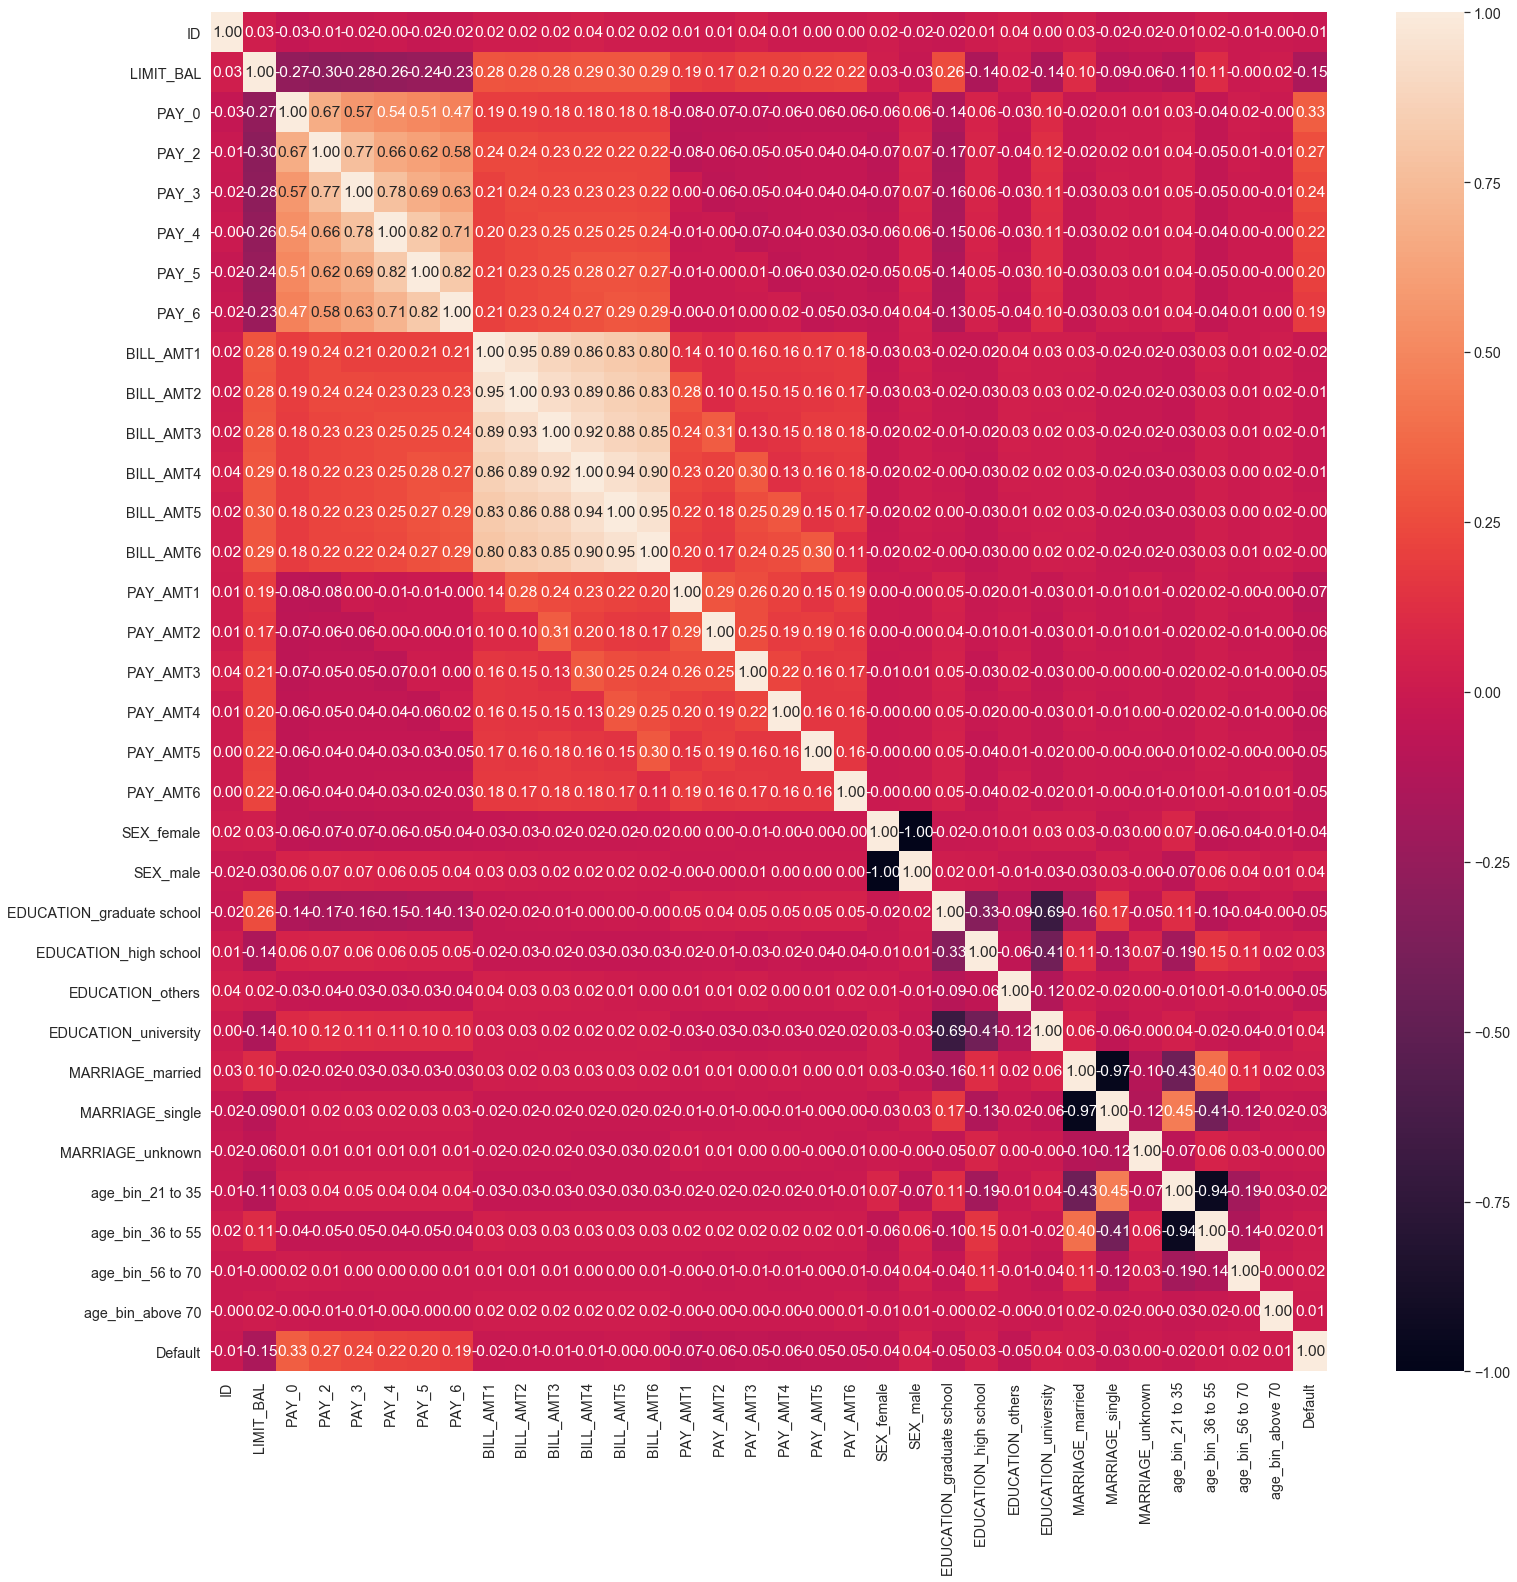

In [42]:
correlation_matrics = df_clean.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrics, annot=True,fmt=".2f")
plt.show()

### Remove Correlated Features
Because there are some correlations, let's remove the correlated data that has more than 0.89 correlation.

In [43]:
corr_over_col = []
corr_col = []
def remove_corr(df,thresh=0.85):
    """
    remove_corr(df,thresh=0.85):
        return columns with thresh correlation to drop
    Parameters:
        df: dataframe
            correlation_matrix
        thresh: float
            correlation threshold
    Return:
        removed_col: set()
            columns' name to be droped
    """
    removed_col=set()
    for col in df.columns:
        if col in removed_col:
            continue
        else:
            upper_thresh = (df[col]>=thresh)&(df[col]<1)
            lowwer_thresh = (df[col]<=-1*thresh)
            idx = np.where(upper_thresh | lowwer_thresh)
            temp = df.iloc[idx].index
            
            if len(temp):
                removed_col.update(list(temp))
    return list(removed_col)

In [44]:
corr_col = remove_corr(correlation_matrics,0.89)
print(corr_col)

['BILL_AMT2', 'BILL_AMT3', 'SEX_male', 'age_bin_36 to 55', 'BILL_AMT5', 'MARRIAGE_single', 'BILL_AMT6']


In [45]:
df_clean.drop(columns=corr_col
              ,inplace=True)

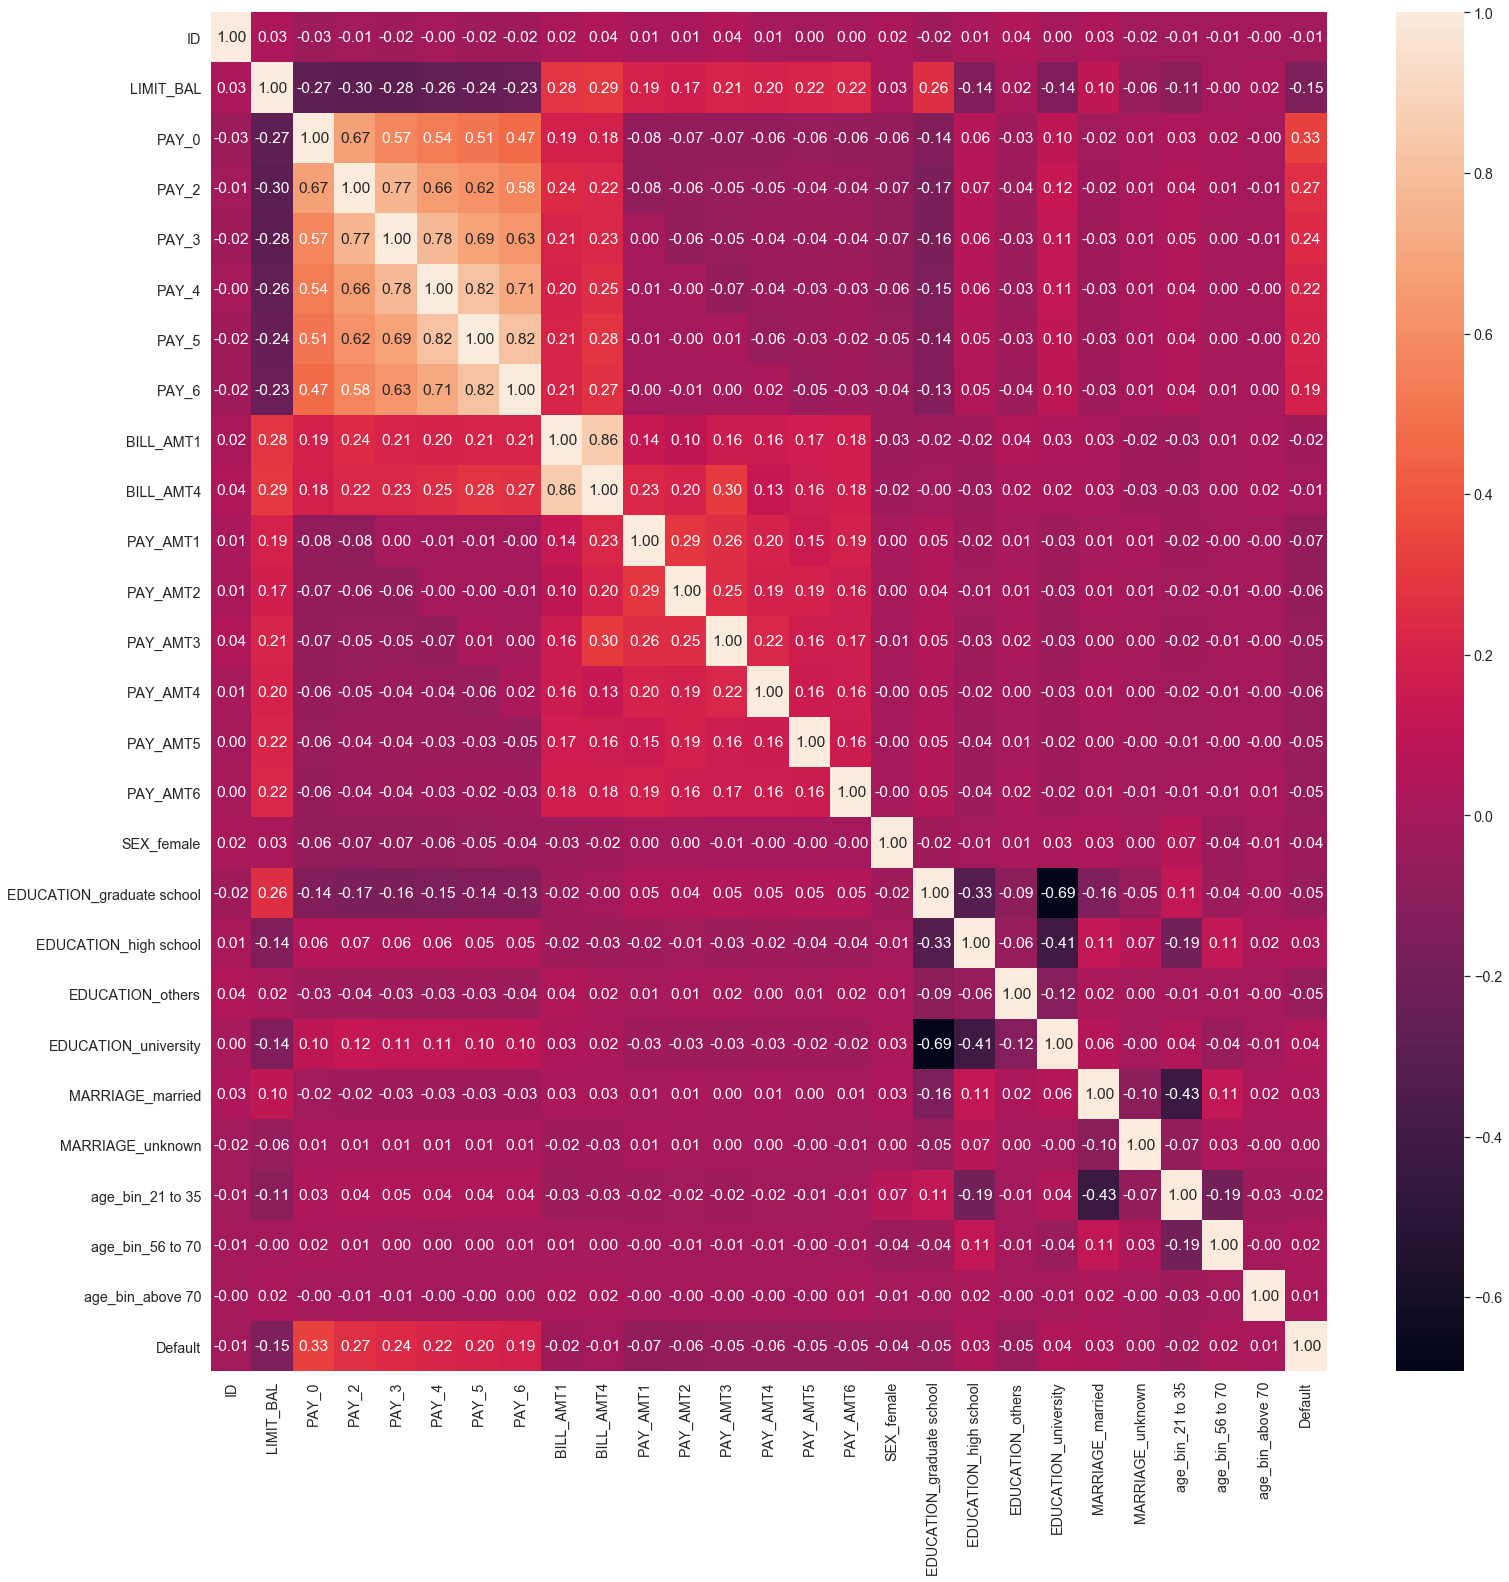

In [46]:
correlation_matrics = df_clean.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrics, annot=True,fmt=".2f")
plt.show()

### Check for Duplication

In [47]:
df_clean.duplicated().sum()

0

In [48]:
df_clean.shape

(27000, 27)

## Functions for Model evaluate/select/build

In [49]:
def preprocessing(df,work_type=None,with_corr=False):

    # Validate values
    df = validate_values(df)
    
    # fill null values
    df = fill_null(df)
    
    # convert age to bins
    df['age_bin'] = age_bins(df['AGE'])
    df.drop(columns='AGE'
                ,inplace=True)
    
    # categorical encoding "one hot encoding"
    df = cate_encode(df)
    
    # Remove strong correlations
    if with_corr:
        if work_type=='over':
            
            drop_col = corr_over_col.copy()
        else:
            drop_col = corr_col.copy()
        drop_col.append('ID')
        df.drop(columns=drop_col
                  ,inplace=True)

    return df


### Model Evaluation

In [50]:
def eval_matrix(y_true, y_pred, title='training'):
    """
    eval_matrix(y_true, y_pred, title='training')
        evaluate a model using confusion matrix 
    Parameters:
        y_true: pandas sereis
            labels/true values
        y_pred: pandas sereis
            predicted values
        title: str
            type of evaluation traing/validation/test
    Return:
        None
    """
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy}')
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    print(f'Precision: {precision}')
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    print(f'Recall: {recall}')
    
    # Calculate f1
    f1 = f1_score(y_true, y_pred)
    print(f'F1_score: {f1}')
    
    confusion_matrix = pd.crosstab(index=y_true
                                   , columns=np.round(y_pred)
                                   , rownames=['True']
                                   , colnames=['predictions']
                                  ).astype(int)
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix
                , annot=True
                , fmt='.2f'
                , cmap="YlGnBu"
               ).set_title('Confusion Matrix: {}'.format(title)) 
    plt.show()
    

### Model Selection

In [51]:
# get a list of models to evaluate
def get_models(class_weight=None):
    """
    get_models()
     get a list of models to evaluate
    Parameters:
        None
    Return:
        List
    """
    if class_weight:
        dict_weight = {0:1,1:int(class_weight)}
    else:
        dict_weight =class_weight
    models = list()
    models.append(LogisticRegression(class_weight=dict_weight))
    models.append(SGDClassifier(class_weight=dict_weight))
    models.append(LinearSVC(class_weight=dict_weight))
    models.append(RandomForestClassifier(class_weight=dict_weight))
    models.append(XGBClassifier(scale_pos_weight=class_weight))
    return models

In [52]:
def kfold_model(model, X, y, k, metric='accuracy'):
    """
    kfold_model(model, X, y, k, metric='accuracy')
        evaluate a model using kfold cross validation
    Parameters:
        model:estimator()
            model to evaluate
        X: pandas dataframe
            features
        y: pandas sereis
            labels/target column
        k: int
            number of kfold
        metric: str
            scorring metric
    Return:
        scores: list
            model scores
    """
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
    scores = []
    i=0
    for train, val in kfold.split(X,y):
        i+=1
        x_train, x_val = X.iloc[train,:], X.iloc[val,:]
        y_train, y_val = y.iloc[train], y.iloc[val]
        
        model.fit(x_train,y_train)
        print('*'*10,'{} fold'.format(i),'*'*10)
        pred_train =model.predict(x_train)
        eval_matrix(y_train, pred_train)
        
        pred_val = model.predict(x_val)
        eval_matrix(y_val, pred_val, 'Validation')
        
        if metric=='accuracy':
            scores.append(accuracy_score(y_val,pred_val))
        elif metric=='precision':
            scores.append(precision_score(y_val,pred_val))
        elif metric=='recall':
            scores.append(recall_score(y_val,pred_val))
        elif metric=='f1':
            scores.append(f1_score(y_val,pred_val))
            
    return scores

In [53]:
# define test conditions
def model_sel(X, y,model=None,class_weight=None, metric='accuracy', k=5, draw=False):
    # get the list of models to consider
    models = []
    if model==None:
        models = get_models(class_weight)
    else:
        models.append(model)
    
    # evaluate each model
    for model in models:
        print('>{m}: '.format(m=type(model).__name__))
        cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
        if draw:
            scores = kfold_model(model
                                   ,X
                                   ,y
                                   ,k
                                   ,metric)
        else:
            scores = cross_val_score(model
                            ,X
                            ,y
                            ,cv=cv
                            ,scoring=metric
                            ,n_jobs=-1)
        # summarize progress
        print('>{m}: {a} {met}={s} '.format(m=type(model).__name__, met=metric, s=scores, a=np.mean(scores)))
        print('*'*50)

## How to work with imbalance dataset
As we know eariler the data is imbalance so we have Two methods:<br>
    <ol>
    <li> The Methods at Algorithm Level.</li>
    <li>The Methods at Data Level.</li>
    </ol>

### 1.The Methods at Algorithm Level.
The methods at algorithm level operate on the algorithms other than the data sets, algorithm can achieve better prediction for the minority class.

#### Model training

In [54]:
X=df_clean.drop(columns=['Default','ID'])
y=df_clean.Default

In [55]:
X.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
26864     250000     -1     -1     -1     -1     -1     -1        396   
24632     210000     -1     -1     -1     -1     -1      0       2776   
20340     200000      0      0      0      0      0      0     193392   
20512     200000      0      0      0      0      0      0     202591   
9990      330000      0      0      0      0      0      0      47644   

       BILL_AMT4  PAY_AMT1  ...  SEX_female  EDUCATION_graduate school  \
26864        396       396  ...           0                          1   
24632        526      2776  ...           0                          0   
20340     160375      5039  ...           1                          0   
20512     195319      7565  ...           0                          0   
9990       50595      2000  ...           1                          0   

       EDUCATION_high school  EDUCATION_others  EDUCATION_university  \
26864                      0                 0                     0   
24632                      0                 0                     1   
20340                      1                 0                     0   
20512                      0                 0                     1   
9990                       0                 0                     1   

       MARRIAGE_married  MARRIAGE_unknown  age_bin_21 to 35  age_bin_56 to 70  \
26864                 1                 0                 0                 0   
24632                 0                 0                 0                 0   
20340                 1                 0                 0                 1   
20512                 0                 0                 1                 0   
9990                  1                 0                 0                 0   

       age_bin_above 70  
26864                 0  
24632                 0  
20340                 0  
20512                 0  
9990                  0  

[5 rows x 25 columns]

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X
                                               ,y
                                               ,test_size=0.1
                                               , random_state=42
                                               , shuffle=True
                                               , stratify=y
                                              )

In [57]:
weight_class = np.round((y_train==0).sum()/(y_train==1).sum())
weight_class

4.0

In [58]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

#### Model predict & evaluate

In [59]:
preds = model.predict(X_test)

Accuracy: 0.695925925925926
Precision: 0.3328358208955224
Recall: 0.37353433835845895
F1_score: 0.3520126282557222


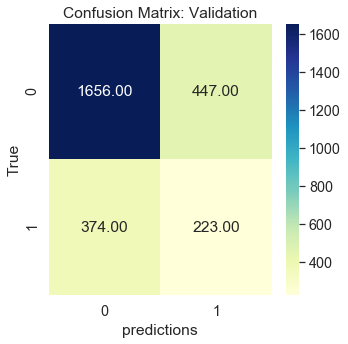

In [60]:
eval_matrix(y_test, preds, 'Validation')

F1_score metric is low, let's try another model.

### Model Selection

In [61]:
model_sel(X_train, y_train,class_weight= weight_class, metric='f1')

>LogisticRegression: 
>LogisticRegression: 0.35135569091734264 f1=[0.35365392 0.35716988 0.33963663 0.34601044 0.36030758] 
**************************************************
>SGDClassifier: 
>SGDClassifier: 0.29790207756415005 f1=[0.38365759 0.36432377 0.01096892 0.36495343 0.36560668] 
**************************************************
>LinearSVC: 
>LinearSVC: 0.12514708778916414 f1=[0.00369344 0.         0.26015654 0.         0.36188545] 
**************************************************
>RandomForestClassifier: 
>RandomForestClassifier: 0.4545935445062175 f1=[0.45048309 0.43594414 0.44779722 0.47106955 0.46767372] 
**************************************************
>XGBClassifier: 
>XGBClassifier: 0.5092173561696745 f1=[0.51934125 0.5029988  0.49820646 0.5108055  0.51473477] 
**************************************************


#### We will work with XGBClassifier

## Features Engineering

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.<br>
So we don't use any scaler here, to verify that we just try standerscaling.

#### Try  standerscaling

In [62]:
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train))

In [63]:
model = XGBClassifier(scale_pos_weight=weight_class)
model_sel(X=X_train_scaler, y=y_train, model=model,metric='f1')

>XGBClassifier: 
>XGBClassifier: 0.5092575960737128 f1=[0.51934125 0.5032     0.49820646 0.5108055  0.51473477] 
**************************************************


As we mentioned earlier there is no improvement after applaying scalling

#### Try add more features

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_p = pd.DataFrame(poly.fit_transform(X_train))

In [65]:
model = XGBClassifier(scale_pos_weight=weight_class)
model_sel(X=X_p, y=y_train, model=model,metric='f1')

>XGBClassifier: 
>XGBClassifier: 0.5113049528959441 f1=[0.52545027 0.51217532 0.50263478 0.50922213 0.50704225] 
**************************************************


No improvement again

## HyberParameter tuning

In [66]:
param_grid = {'eta':[0.01,0.1,0.2,0.3]
             , 'max_depth':[3,5,10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_clf = RandomizedSearchCV(XGBClassifier(scale_pos_weight=weight_class), param_grid, cv = cv, scoring= 'f1')
grid_clf.fit(X=X_train, y=y_train)
best = grid_clf.best_estimator_
print(grid_clf.best_estimator_)
print(np.abs(grid_clf.best_score_))

[02:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:39:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:40:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Model Evaluation

In [67]:
model = XGBClassifier( eta=0.1, max_depth=5,scale_pos_weight=weight_class)
model.fit(X_train,y_train)

[02:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4.0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.7444444444444445
Precision: 0.4485049833887043
Recall: 0.678391959798995
F1_score: 0.54


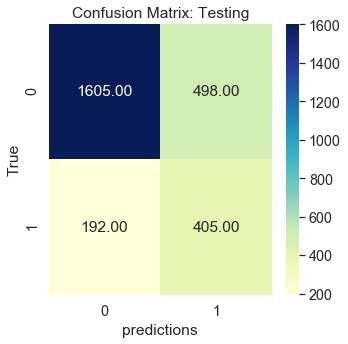

In [68]:
preds = model.predict(X_test)
eval_matrix(y_test, preds, 'Testing')

### Production test

In [69]:
X_prod = preprocessing(df_prod.drop(columns=['default payment next month']),with_corr=True)
y_prod = df_prod['default payment next month']
X_prod.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
11981     200000     -1     -1     -1     -1     -1     -1       9754   
908        50000      0      0      0      0      0      0       7010   
5448       50000      0      0      0      0      0      0      47754   
6070       80000      0      0      0      0      0      0      74228   
27256     150000     -2     -2     -2     -2     -2     -2        389   

       BILL_AMT4  PAY_AMT1  ...  SEX_female  EDUCATION_graduate school  \
11981       4410     56243  ...           1                          0   
908        12915      3000  ...           0                          1   
5448        9044      2280  ...           0                          1   
6070       30526      3500  ...           1                          0   
27256        882       350  ...           0                          0   

       EDUCATION_high school  EDUCATION_others  EDUCATION_university  \
11981                      0                 0                     1   
908                        0                 0                     0   
5448                       0                 0                     0   
6070                       0                 0                     1   
27256                      1                 0                     0   

       MARRIAGE_married  MARRIAGE_unknown  age_bin_21 to 35  age_bin_56 to 70  \
11981                 1                 0                 0                 0   
908                   0                 0                 1                 0   
5448                  0                 0                 0                 0   
6070                  1                 0                 0                 0   
27256                 1                 0                 0                 0   

       age_bin_above 70  
11981                 0  
908                   0  
5448                  0  
6070                  0  
27256                 0  

[5 rows x 25 columns]

In [70]:
X_prod.shape,X_train.shape

((3000, 25), (24300, 25))

Accuracy: 0.732
Precision: 0.4290060851926978
Recall: 0.6370481927710844
F1_score: 0.5127272727272728


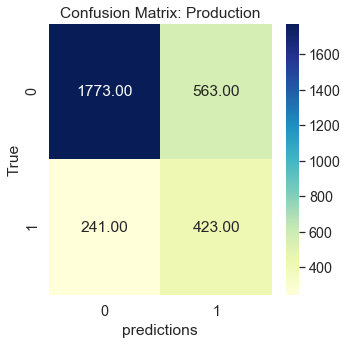

In [71]:
preds = model.predict(X_prod)
eval_matrix(y_prod, preds, 'Production')

### 1.The Methods at Algorithm Level.
<ol>
<li> Under sampling (decrease the `majority` class to be equal the `minority` one)</li>
<li> Over sampling (increase the `minority` class to be equal the `majority` one)</li>
</ol>
Because the dataset is small we cannot work with option 1, as we will lose alot of information.

## OverSampling

In [72]:
df_u = preprocessing(df_train.copy())
df_u.head()

ID  LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
26864  26865     250000     -1     -1     -1     -1     -1     -1        396   
24632  24633     210000     -1     -1     -1     -1     -1      0       2776   
20340  20341     200000      0      0      0      0      0      0     193392   
20512  20513     200000      0      0      0      0      0      0     202591   
9990    9991     330000      0      0      0      0      0      0      47644   

       BILL_AMT2  ...  EDUCATION_high school  EDUCATION_others  \
26864        396  ...                      0                 0   
24632       2776  ...                      0                 0   
20340     159546  ...                      1                 0   
20512     202924  ...                      0                 0   
9990       48906  ...                      0                 0   

       EDUCATION_university  MARRIAGE_married  MARRIAGE_single  \
26864                     0                 1                0   
24632                     1                 0                1   
20340                     0                 1                0   
20512                     1                 0                1   
9990                      1                 1                0   

       MARRIAGE_unknown  age_bin_21 to 35  age_bin_36 to 55  age_bin_56 to 70  \
26864                 0                 0                 1                 0   
24632                 0                 0                 1                 0   
20340                 0                 0                 0                 1   
20512                 0                 1                 0                 0   
9990                  0                 0                 1                 0   

       age_bin_above 70  
26864                 0  
24632                 0  
20340                 0  
20512                 0  
9990                  0  

[5 rows x 34 columns]

In [73]:
df_u.columns

Index(['ID', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'Default', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_married',
       'MARRIAGE_single', 'MARRIAGE_unknown', 'age_bin_21 to 35',
       'age_bin_36 to 55', 'age_bin_56 to 70', 'age_bin_above 70'],
      dtype='object')

In [74]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE 

# Drop the columns from your original dataset that you don't need
X = df_u.drop(columns=['Default','ID'])

# Use the class feature as the labels
y = df_u['Default']

sm = SMOTE(random_state=35)
X_res, y_res = sm.fit_resample(X, y)

In [75]:
smote_df = pd.DataFrame(X_res,columns=X.columns)
smote_df['Default'] = y_res
smote_df.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0     250000     -1     -1     -1     -1     -1     -1        396        396   
1     210000     -1     -1     -1     -1     -1      0       2776       2776   
2     200000      0      0      0      0      0      0     193392     159546   
3     200000      0      0      0      0      0      0     202591     202924   
4     330000      0      0      0      0      0      0      47644      48906   

   BILL_AMT3  ...  EDUCATION_others  EDUCATION_university  MARRIAGE_married  \
0        396  ...                 0                     0                 1   
1       2776  ...                 0                     1                 0   
2     158486  ...                 0                     0                 1   
3     204693  ...                 0                     1                 0   
4      50531  ...                 0                     1                 1   

   MARRIAGE_single  MARRIAGE_unknown  age_bin_21 to 35  age_bin_36 to 55  \
0                0                 0                 0                 1   
1                1                 0                 0                 1   
2                0                 0                 0                 0   
3                1                 0                 1                 0   
4                0                 0                 0                 1   

   age_bin_56 to 70  age_bin_above 70  Default  
0                 0                 0        0  
1                 0                 0        0  
2                 1                 0        0  
3                 0                 0        0  
4                 0                 0        0  

[5 rows x 33 columns]

In [76]:
smote_df.shape

(42056, 33)

In [77]:
smote_df.duplicated().sum()

603

In [78]:
smote_df.drop_duplicates(inplace=True)

In [79]:
smote_df.duplicated().sum()

0

##### Check for correlation between features after oversampling

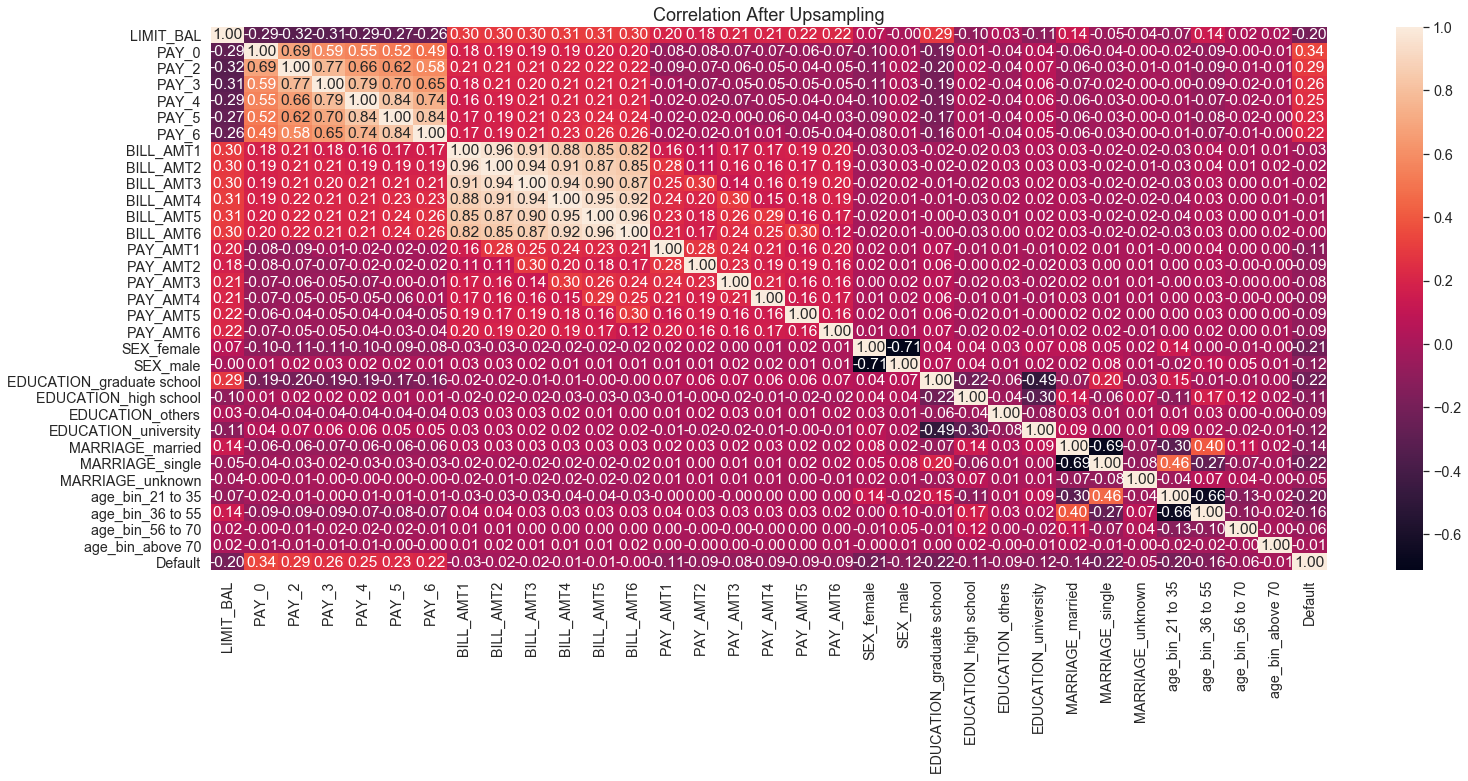

In [80]:
plt.figure(figsize = (25,10))

correlation_matrix_over = smote_df.corr()
sns.heatmap(correlation_matrix_over, annot=True,fmt=".2f");

plt.title('Correlation After Upsampling',fontdict={'size':'18'})
plt.show()

In [81]:
corr_over_col = remove_corr(correlation_matrix_over,0.89)
print(corr_over_col)

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT6']


In [82]:
smote_df.drop(columns=corr_over_col,inplace=True)

### Model Selection (UpSampling)

In [83]:
X_res, y_res = smote_df.drop(columns='Default'),smote_df.Default

In [84]:
X_train_u,X_test_u,y_train_u,y_test_u=train_test_split(X_res
                                               ,y_res
                                               ,test_size=0.1
                                               , random_state=42
                                               , shuffle=True
                                              )

In [85]:
model_sel(X=X_train_u, y=y_train_u, metric='f1')

>LogisticRegression: 
>LogisticRegression: 0.435906103584528 f1=[0.4406662  0.43224092 0.43845211 0.42910382 0.43906747] 
**************************************************
>SGDClassifier: 
>SGDClassifier: 0.3119538739997347 f1=[0.38806928 0.         0.66503756 0.         0.50666253] 
**************************************************
>LinearSVC: 
>LinearSVC: 0.4821065832239678 f1=[0.00268745 0.6039068  0.66443318 0.66373823 0.47576725] 
**************************************************
>RandomForestClassifier: 
>RandomForestClassifier: 0.8671934313813854 f1=[0.86152547 0.86865879 0.86672302 0.86393696 0.87512291] 
**************************************************
>XGBClassifier: 
>XGBClassifier: 0.8592408735094669 f1=[0.84987058 0.86752804 0.85809249 0.85697858 0.86373468] 
**************************************************


#### Evaluate RandomForest

>RandomForestClassifier: 
********** 1 fold **********
Accuracy: 0.9987602613503099
Precision: 0.9987850971922246
Recall: 0.9987176891408517
F1_score: 0.9987513920291566


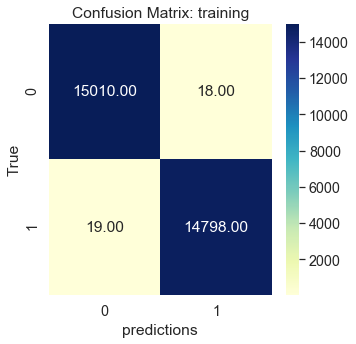

Accuracy: 0.8677298311444653
Precision: 0.8989720998531571
Recall: 0.8264038876889849
F1_score: 0.8611619074412715


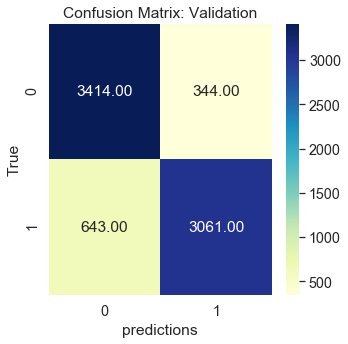

********** 2 fold **********
Accuracy: 0.9983916904004021
Precision: 0.9986493787142086
Recall: 0.9981101511879049
F1_score: 0.9983796921415069


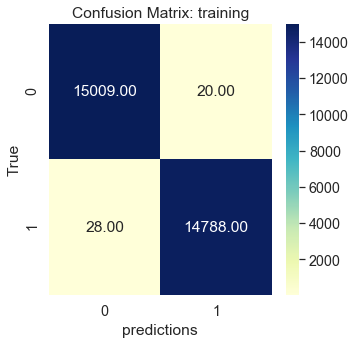

Accuracy: 0.8761726078799249
Precision: 0.8958155422715628
Recall: 0.8493927125506073
F1_score: 0.8719866999168745


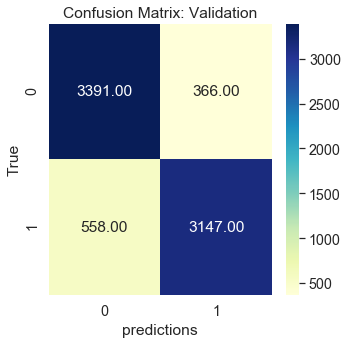

********** 3 fold **********
Accuracy: 0.9984587549420357
Precision: 0.9984477289599784
Recall: 0.9984477289599784
F1_score: 0.9984477289599784


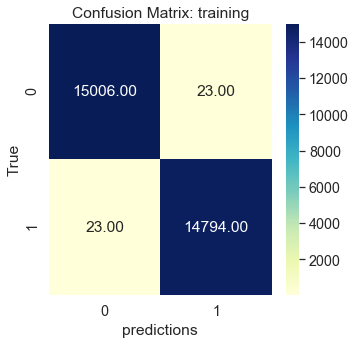

Accuracy: 0.8756198900951615
Precision: 0.9116251482799526
Recall: 0.8299136069114471
F1_score: 0.8688524590163934


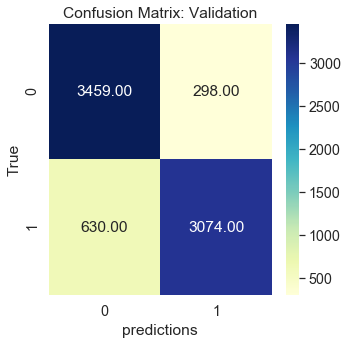

********** 4 fold **********
Accuracy: 0.9982242176506064
Precision: 0.9984469952734639
Recall: 0.9979752986434501
F1_score: 0.998211091234347


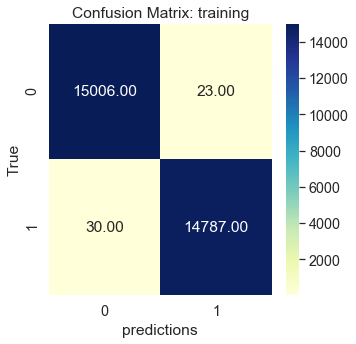

Accuracy: 0.8721351025331725
Precision: 0.903462441314554
Recall: 0.8312634989200864
F1_score: 0.8658605174353206


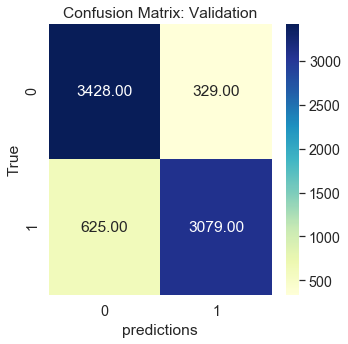

********** 5 fold **********
Accuracy: 0.9987603028881592
Precision: 0.9988524368840286
Recall: 0.9986501990956334
F1_score: 0.9987513077520165


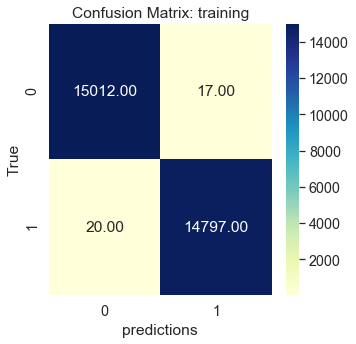

Accuracy: 0.8795067685296877
Precision: 0.9106881405563689
Recall: 0.8396328293736501
F1_score: 0.8737182188509621


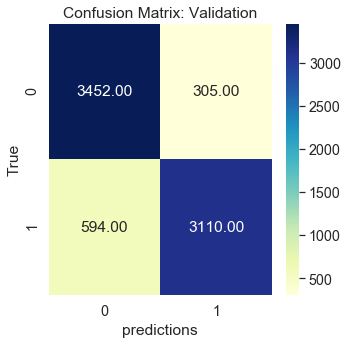

>RandomForestClassifier: 0.8683159605321643 f1=[0.8611619074412715, 0.8719866999168745, 0.8688524590163934, 0.8658605174353206, 0.8737182188509621] 
**************************************************


In [86]:
model_sel(X=X_train_u
          , y=y_train_u
          , model=RandomForestClassifier()
          , draw=True
         , metric='f1')

In [87]:
model=RandomForestClassifier()
model.fit(X=X_train_u
          , y=y_train_u)

RandomForestClassifier()

Accuracy: 0.998150481142949
Precision: 0.9983794295592049
Recall: 0.9978942821661897
F1_score: 0.9981367969108632


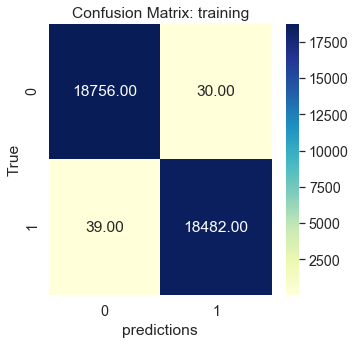

Accuracy: 0.8753014954172696
Precision: 0.9078316462440064
Recall: 0.83203125
F1_score: 0.86828025477707


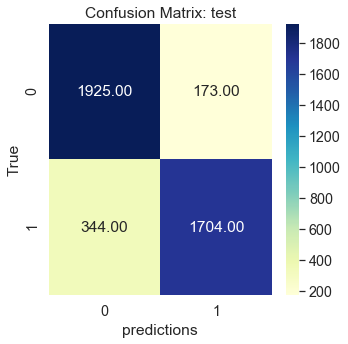

In [88]:
preds = model.predict(X_train_u)
eval_matrix(y_train_u, preds, 'training')
preds = model.predict(X_test_u)
eval_matrix(y_test_u, preds, 'test')

Model overfiting

#### Check GradientBoostingClassifier

>XGBClassifier: 
[02:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 1 fold **********
Accuracy: 0.9231026972692243
Precision: 0.9692699745165643
Recall: 0.8727812647634474
F1_score: 0.9184985262260734


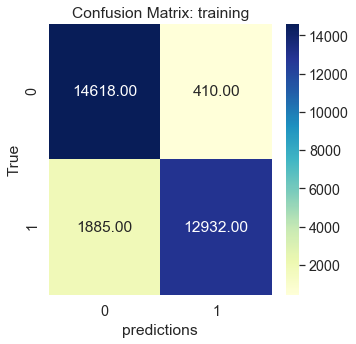

Accuracy: 0.8600911283838113
Precision: 0.9092307692307692
Recall: 0.7977861771058316
F1_score: 0.8498705780845556


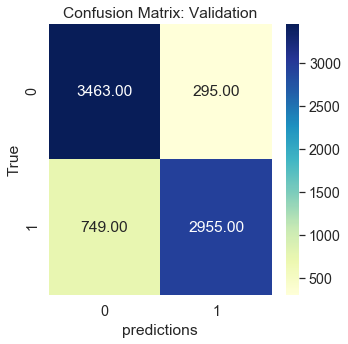

[02:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 2 fold **********
Accuracy: 0.9210252973697437
Precision: 0.9693362465154826
Recall: 0.8683855291576674
F1_score: 0.916088148385489


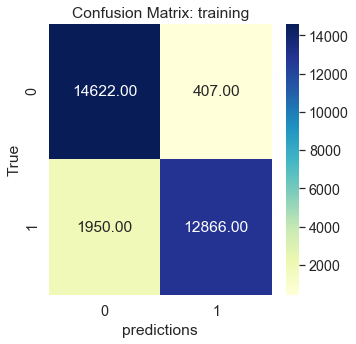

Accuracy: 0.8749664969177164
Precision: 0.9152186938286399
Recall: 0.8245614035087719
F1_score: 0.8675280420275451


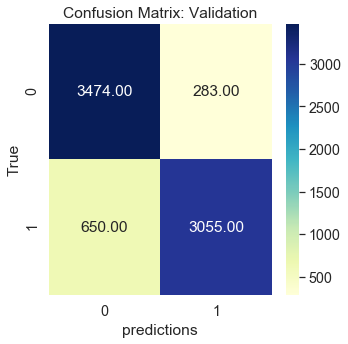

[02:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 3 fold **********
Accuracy: 0.9216645446626014
Precision: 0.9710123046727561
Recall: 0.8681244516433826
F1_score: 0.9166904218928165


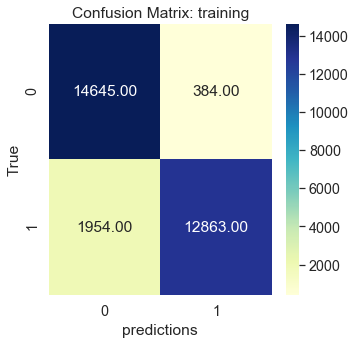

Accuracy: 0.868382254389492
Precision: 0.9231965174129353
Recall: 0.8015658747300216
F1_score: 0.858092485549133


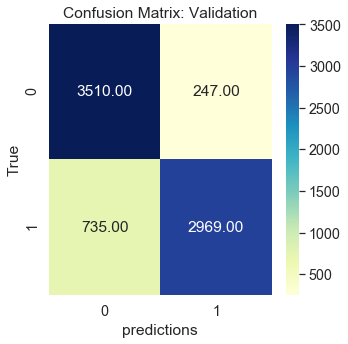

[02:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 4 fold **********
Accuracy: 0.9230717684111773
Precision: 0.9705373919579106
Recall: 0.8714989539042991
F1_score: 0.9183557357229215


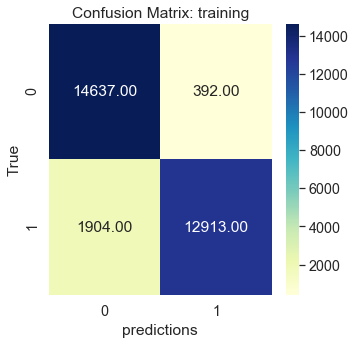

Accuracy: 0.8666398606084975
Precision: 0.9163848754995388
Recall: 0.8048056155507559
F1_score: 0.8569785827224379


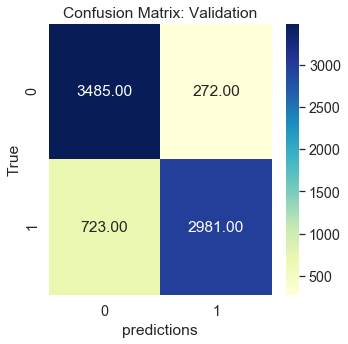

[02:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 5 fold **********
Accuracy: 0.9189841184748375
Precision: 0.9667946690761238
Recall: 0.866572180603361
F1_score: 0.9139440529575058


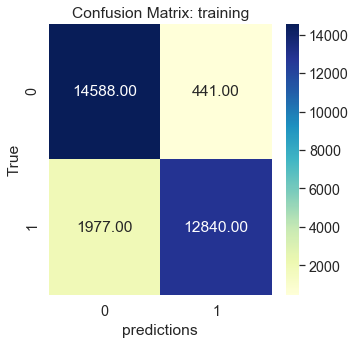

Accuracy: 0.873341375150784
Precision: 0.9269575982667905
Recall: 0.808585313174946
F1_score: 0.8637346791636626


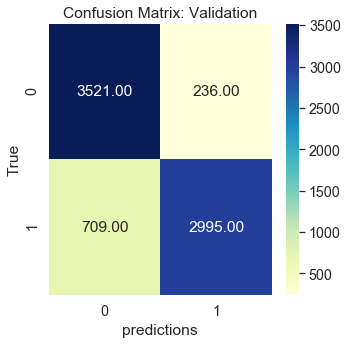

>XGBClassifier: 0.8592408735094669 f1=[0.8498705780845556, 0.8675280420275451, 0.858092485549133, 0.8569785827224379, 0.8637346791636626] 
**************************************************


In [89]:
model_sel(X=X_train_u
          , y=y_train_u
          , model=XGBClassifier()
          , draw=True
          ,metric='f1')

In [90]:
model=XGBClassifier()
model.fit(X=X_train_u
          , y=y_train_u)

[02:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.9159407081780899
Precision: 0.9643827346815576
Recall: 0.862534420387668
F1_score: 0.9106196203613977


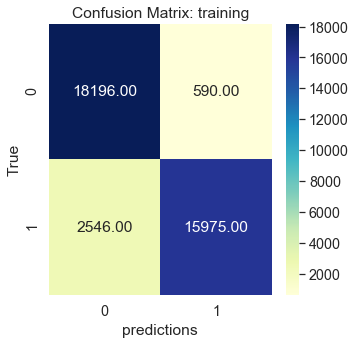

Accuracy: 0.8673420164013507
Precision: 0.9156492785793563
Recall: 0.8056640625
F1_score: 0.8571428571428572


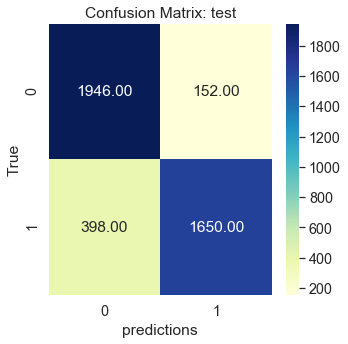

In [91]:
preds = model.predict(X_train_u)
eval_matrix(y_train_u, preds, 'training')
preds = model.predict(X_test_u)
eval_matrix(y_test_u, preds, 'test')

## Test a model

In [92]:
X_prod = preprocessing(df_prod.drop(columns=['default payment next month']),with_corr=True,work_type='over')
y_prod = df_prod['default payment next month']

Accuracy: 0.805
Precision: 0.5938242280285035
Recall: 0.37650602409638556
F1_score: 0.4608294930875576


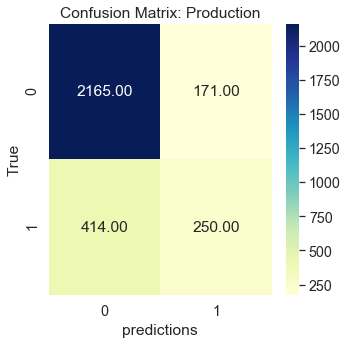

In [93]:
preds = model.predict(X_prod)
eval_matrix(y_prod, preds, 'Production')

### Try borderline smote

In [94]:
from imblearn.over_sampling import BorderlineSMOTE 
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)

In [95]:
X_resampled.shape

(42056, 32)

In [96]:
Borderline_df = pd.DataFrame(X_resampled,columns=X.columns)
Borderline_df['Default'] = y_resampled
Borderline_df.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0     250000     -1     -1     -1     -1     -1     -1        396        396   
1     210000     -1     -1     -1     -1     -1      0       2776       2776   
2     200000      0      0      0      0      0      0     193392     159546   
3     200000      0      0      0      0      0      0     202591     202924   
4     330000      0      0      0      0      0      0      47644      48906   

   BILL_AMT3  ...  EDUCATION_others  EDUCATION_university  MARRIAGE_married  \
0        396  ...                 0                     0                 1   
1       2776  ...                 0                     1                 0   
2     158486  ...                 0                     0                 1   
3     204693  ...                 0                     1                 0   
4      50531  ...                 0                     1                 1   

   MARRIAGE_single  MARRIAGE_unknown  age_bin_21 to 35  age_bin_36 to 55  \
0                0                 0                 0                 1   
1                1                 0                 0                 1   
2                0                 0                 0                 0   
3                1                 0                 1                 0   
4                0                 0                 0                 1   

   age_bin_56 to 70  age_bin_above 70  Default  
0                 0                 0        0  
1                 0                 0        0  
2                 1                 0        0  
3                 0                 0        0  
4                 0                 0        0  

[5 rows x 33 columns]

In [97]:
Borderline_df.duplicated().sum()

528

In [98]:
Borderline_df.drop_duplicates(inplace=True)

In [99]:
Borderline_df.duplicated().sum()

0

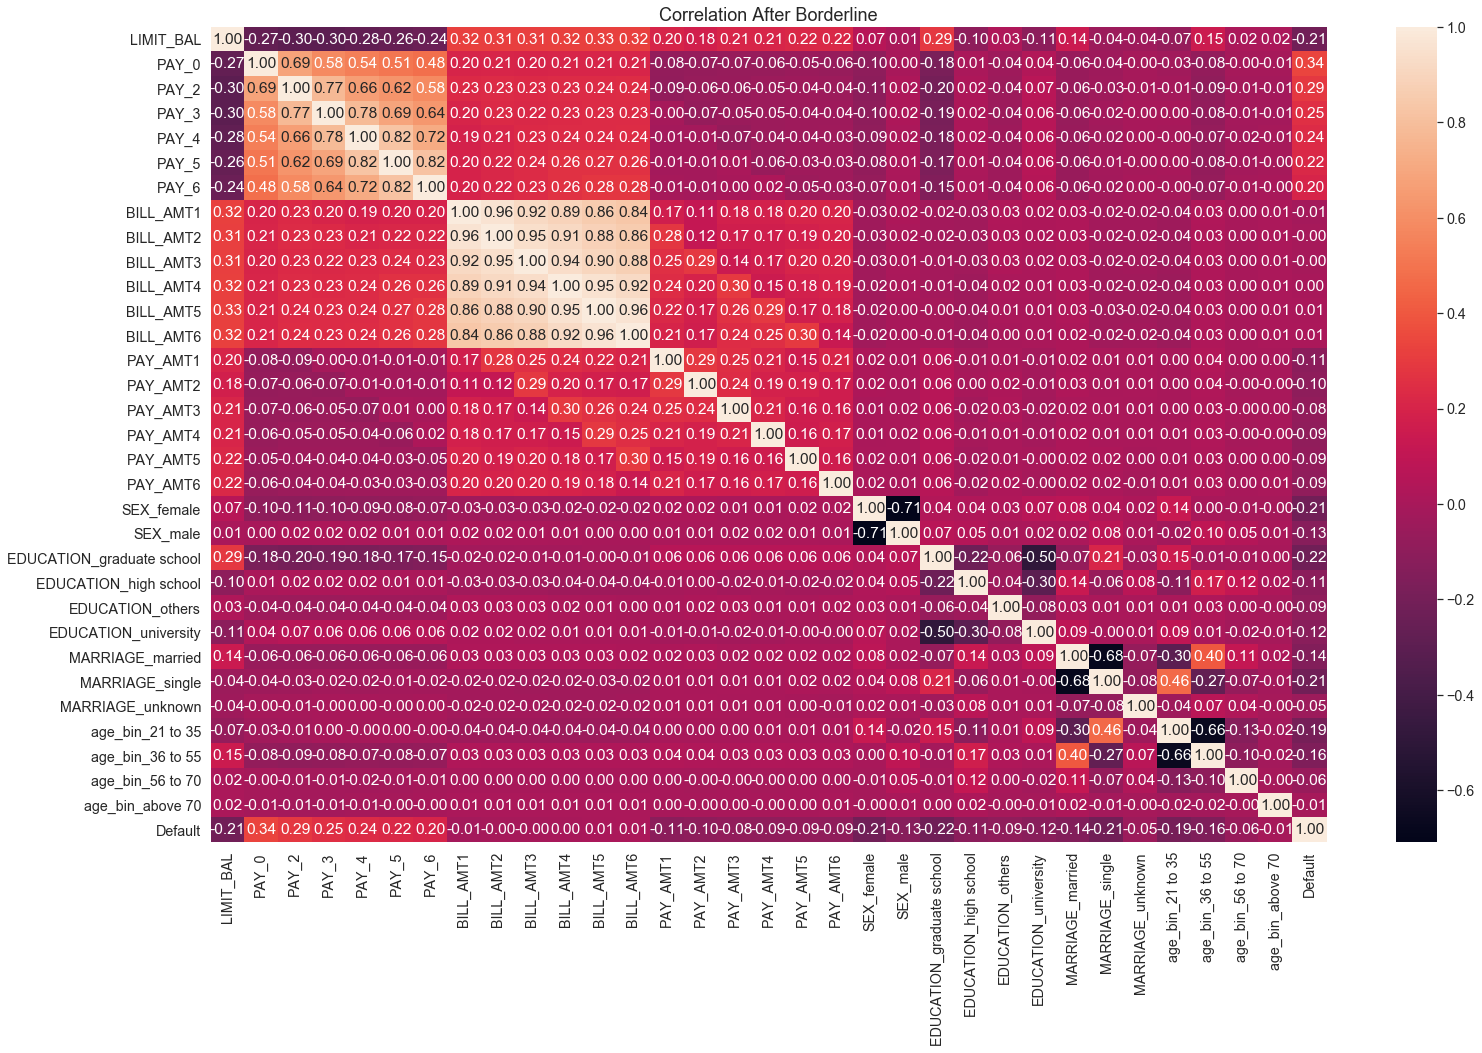

In [100]:
plt.figure(figsize = (25,15))

correlation_matrix_over = Borderline_df.corr()
sns.heatmap(correlation_matrix_over, annot=True,fmt=".2f");

plt.title('Correlation After Borderline',fontdict={'size':'18'})
plt.show()

In [101]:
corr_over_col = remove_corr(correlation_matrix_over,0.89)
print(corr_over_col)

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT6']


In [102]:
Borderline_df.drop(columns=corr_over_col,inplace=True)

In [103]:
X_resempled, y_resempled = Borderline_df.drop(columns='Default'),Borderline_df.Default
X_train_border,X_test_border,y_train_border,y_test_border=train_test_split(X_resempled
                                                                           ,y_resempled
                                                                           ,test_size=0.1
                                                                           , random_state=42
                                                                           , shuffle=True
                                                                          )

In [104]:
model_sel(X=X_train_border, y=y_train_border, metric='f1')

>LogisticRegression: 
>LogisticRegression: 0.4512915602190814 f1=[0.44928288 0.44159836 0.45413947 0.45648829 0.45494881] 
**************************************************
>SGDClassifier: 
>SGDClassifier: 0.3882336583387399 f1=[0.01803235 0.66497516 0.59131345 0.         0.66684734] 
**************************************************
>LinearSVC: 
>LinearSVC: 0.45158866719177315 f1=[0.42869641 0.57691317 0.52997891 0.66853408 0.05382077] 
**************************************************
>RandomForestClassifier: 
>RandomForestClassifier: 0.8682209893131395 f1=[0.87026952 0.86245977 0.86557195 0.87383243 0.86897129] 
**************************************************
>XGBClassifier: 
>XGBClassifier: 0.8605963479603721 f1=[0.85959639 0.8553855  0.864494   0.86310374 0.86040211] 
**************************************************


In [105]:
model=XGBClassifier()
model.fit(X=X_train_border
          , y=y_train_border)

[02:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.9153444816053512
Precision: 0.9649334217027173
Recall: 0.8611604022154111
F1_score: 0.9100983122123089


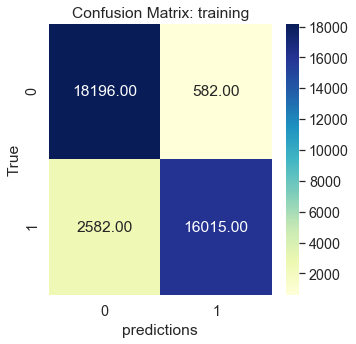

Accuracy: 0.8726222008186852
Precision: 0.9342105263157895
Recall: 0.797752808988764
F1_score: 0.8606060606060606


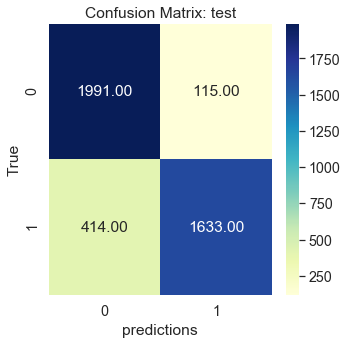

In [106]:
preds = model.predict(X_train_border)
eval_matrix(y_train_border, preds, 'training')
preds = model.predict(X_test_border)
eval_matrix(y_test_border, preds, 'test')

Accuracy: 0.8093333333333333
Precision: 0.6127450980392157
Recall: 0.37650602409638556
F1_score: 0.4664179104477612


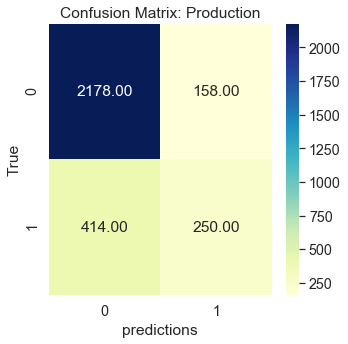

In [107]:
preds = model.predict(X_prod)
eval_matrix(y_prod, preds, 'Production')

### Try SVM smote

In [108]:
from imblearn.over_sampling import SVMSMOTE 
X_resampled, y_resampled = SVMSMOTE(sampling_strategy ='minority',m_neighbors=5).fit_resample(X, y)

In [109]:
X_resampled.shape

(42056, 32)

In [110]:
svm_df = pd.DataFrame(X_resampled,columns=X.columns)
svm_df['Default'] = y_resampled
svm_df.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0     250000     -1     -1     -1     -1     -1     -1        396        396   
1     210000     -1     -1     -1     -1     -1      0       2776       2776   
2     200000      0      0      0      0      0      0     193392     159546   
3     200000      0      0      0      0      0      0     202591     202924   
4     330000      0      0      0      0      0      0      47644      48906   

   BILL_AMT3  ...  EDUCATION_others  EDUCATION_university  MARRIAGE_married  \
0        396  ...                 0                     0                 1   
1       2776  ...                 0                     1                 0   
2     158486  ...                 0                     0                 1   
3     204693  ...                 0                     1                 0   
4      50531  ...                 0                     1                 1   

   MARRIAGE_single  MARRIAGE_unknown  age_bin_21 to 35  age_bin_36 to 55  \
0                0                 0                 0                 1   
1                1                 0                 0                 1   
2                0                 0                 0                 0   
3                1                 0                 1                 0   
4                0                 0                 0                 1   

   age_bin_56 to 70  age_bin_above 70  Default  
0                 0                 0        0  
1                 0                 0        0  
2                 1                 0        0  
3                 0                 0        0  
4                 0                 0        0  

[5 rows x 33 columns]

In [111]:
svm_df.duplicated().sum()

814

In [112]:
svm_df.drop_duplicates(inplace=True)

In [113]:
svm_df.duplicated().sum()

0

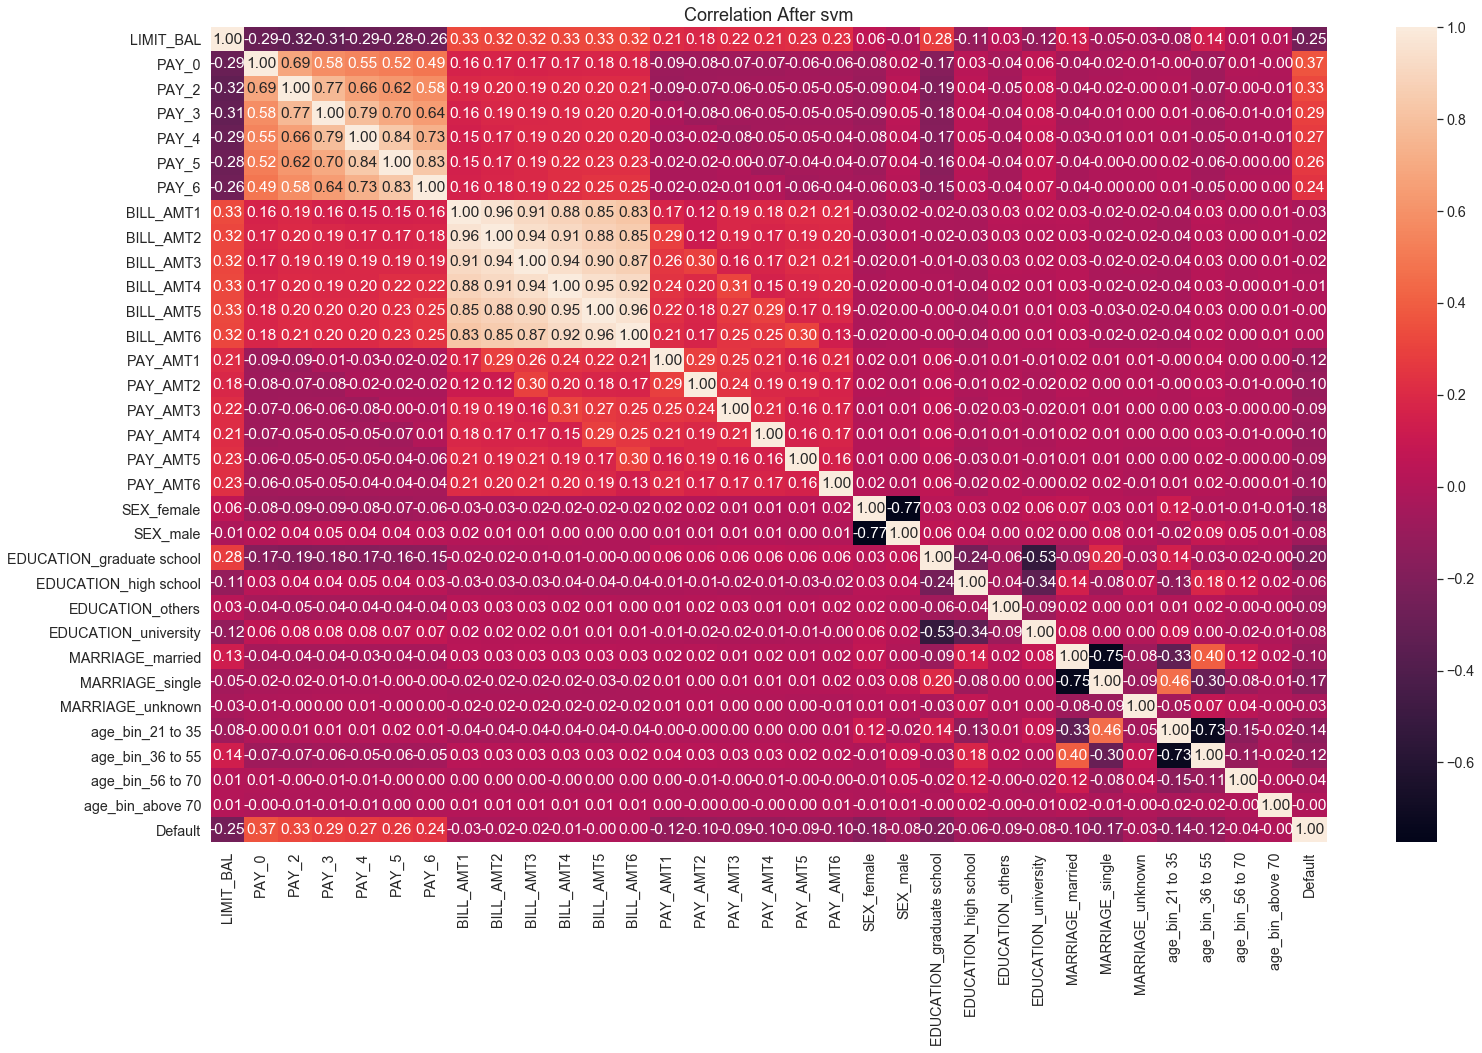

In [114]:
plt.figure(figsize = (25,15))

correlation_matrix_over = svm_df.corr()
sns.heatmap(correlation_matrix_over, annot=True,fmt=".2f");

plt.title('Correlation After svm',fontdict={'size':'18'})
plt.show()

In [115]:
corr_over_col = remove_corr(correlation_matrix_over,0.89)
print(corr_over_col)

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT6']


In [116]:
svm_df.drop(columns=corr_over_col,inplace=True)

In [117]:
X_resempled, y_resempled = svm_df.drop(columns='Default'),svm_df.Default
X_train_svm,X_test_svm,y_train_svm,y_test_svm=train_test_split(X_resempled
                                                                           ,y_resempled
                                                                           ,test_size=0.1
                                                                           , random_state=42
                                                                           , shuffle=True
                                                                          )

In [118]:
model_sel(X=X_train_svm, y=y_train_svm,model=XGBClassifier(), metric='f1')

>XGBClassifier: 
>XGBClassifier: 0.8492212551408708 f1=[0.8507354  0.85490651 0.84221282 0.84498039 0.85327116] 
**************************************************


In [119]:
model=XGBClassifier()
model.fit(X=X_train_svm
          , y=y_train_svm)

[02:49:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.9015545437400652
Precision: 0.9521545869860477
Recall: 0.842694787454923
F1_score: 0.8940869565217391


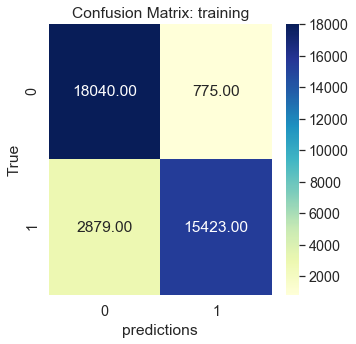

Accuracy: 0.8623030303030303
Precision: 0.9227272727272727
Recall: 0.7898832684824902
F1_score: 0.8511530398322851


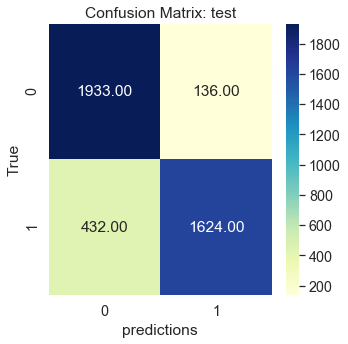

In [120]:
preds = model.predict(X_train_svm)
eval_matrix(y_train_svm, preds, 'training')
preds = model.predict(X_test_svm)
eval_matrix(y_test_svm, preds, 'test')

In [121]:
X_prod = preprocessing(df_prod.drop(columns=['default payment next month']),with_corr=True,work_type='over')
y_prod = df_prod['default payment next month']

Accuracy: 0.813
Precision: 0.6253041362530414
Recall: 0.3870481927710843
F1_score: 0.47813953488372096


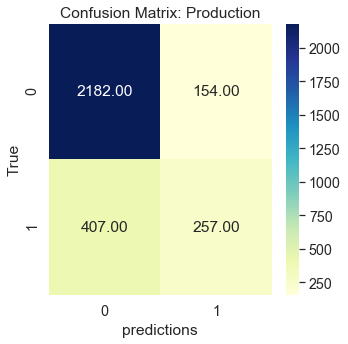

In [122]:
preds = model.predict(X_prod)
eval_matrix(y_prod, preds, 'Production')

## References
[1] Default Credit Card Clients Dataset,<br>
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/<br>
[2] Description of Dataset,<br> https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/181358<br>
[3] preprocessing<br>
https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9<br>
[4] Visualization with seaborn<br> https://www.python-graph-gallery.com/seaborn/<br>
[5] KFold cross validation<br>
https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/<br>
[6] Metrics and scoring<br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>
[7] RandomForrestClassifier,<br> http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
[8]LinearSVC,<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html<br>
[9]GradientBoostClassifier<br>
https://www.kaggle.com/prashant111/bagging-vs-boosting<br>


